In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import tensorflow
from wordcloud import WordCloud


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow. keras .preprocessing.sequence import pad_sequences
from tensorflow. keras.models import Sequential
from tensorflow. keras. layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
features = pd.read_csv('/content/drive/MyDrive/Copy of features.csv')

In [ ]:
features.head()

In [ ]:
import pandas as pd
  
# reading the csv file
df = pd.read_csv('/content/drive/MyDrive/Copy of features.csv')
df = df[df['ns_label'] == 'reliable']
df['class_label']=1  
df.to_csv("/content/drive/MyDrive/relaible.csv")


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
import pandas as pd
  
# reading the csv file
df = pd.read_csv('/content/drive/MyDrive/Copy of features.csv')
df = df[df['ns_label'] == 'conspiracy']
df['class_label']=2
df.to_csv("/content/drive/MyDrive/conspiracy.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
import pandas as pd
  
# reading the csv file
df = pd.read_csv('/content/drive/MyDrive/Copy of features.csv')
df = df[df['ns_label'] == 'unreliable']
df['class_label']=0
df.to_csv("/content/drive/MyDrive/unrelaible.csv")

In [ ]:
# #conspiracy
# conspiracy=pd.read_csv('/content/drive/MyDrive/conspiracy.csv')

# reliable['ns_label'].value_counts()
# reliable.columns


In [ ]:
reliable=pd.read_csv('/content/drive/MyDrive/relaible.csv')

reliable['ns_label'].value_counts()
#reliable.columns

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,8,9,10,11,12,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


reliable    217279
Name: ns_label, dtype: int64

In [ ]:
unreliable=pd.read_csv('/content/drive/MyDrive/unrelaible.csv')

unreliable['ns_label'].value_counts()
#unreliable.columns

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (58) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


unreliable    51261
Name: ns_label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


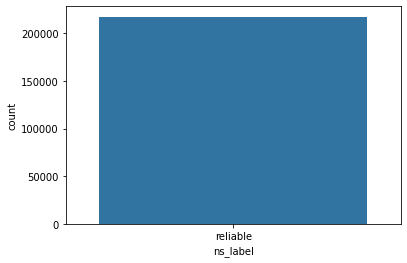

In [ ]:
sns.countplot('ns_label',data=reliable)

In [ ]:
text=''.join(reliable['text'].tolist())

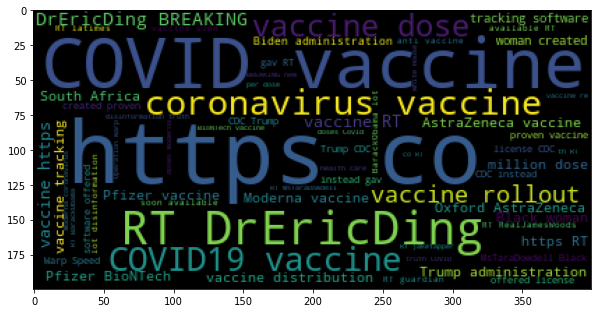

In [ ]:
wordcloud=WordCloud().generate(text)
fig = plt.figure(figsize=(10,20))
plt.imshow(wordcloud)

In [ ]:
text=''.join(unreliable['text'].tolist())

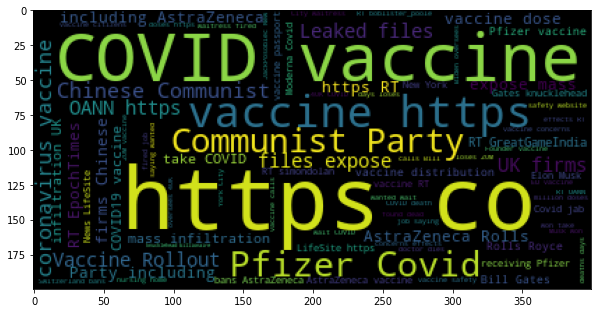

In [ ]:
wordcloud=WordCloud().generate(text)
fig = plt.figure(figsize=(10,20))
plt.imshow(wordcloud)

In [ ]:
text=''.join(conspiracy['text'].tolist())


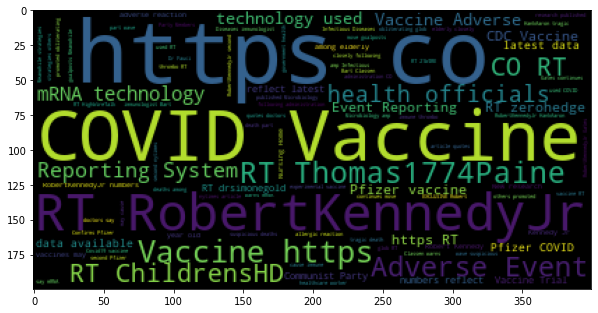

In [ ]:
wordcloud=WordCloud().generate(text)
fig = plt.figure(figsize=(10,20))
plt.imshow(wordcloud)

In [ ]:
empty_r_index = [index for index, token in enumerate (reliable.token.tolist()) if str(token).strip()==""]

In [ ]:
reliable.iloc[empty_r_index]

,Unnamed: 0,tweetid,userid,screen_name,date,lang,location,place_id,place_url,place_type,...,qtd_location,sent_vader,token,media_urls,rt_media_urls,q_media_urls,corrected_tweet_type,ns_label,ns_url,class_label


In [ ]:
rel=reliable[['token','class_label']]

In [ ]:
unrel=unreliable[['token','class_label']]

In [ ]:
#cons=conspiracy[['token','class_label']]

In [ ]:
data=rel.append(unrel, ignore_index=True)

In [ ]:
#data=rel.append(dat, ignore_index=True)

In [ ]:
data.sample(5)

,token,class_label
236992,report four volunteers took pfizer's covid 'va...,2
29552,fact checkers clarify 6 people die covid vacci...,1
105555,new york city waitress fired getting covid-19 ...,1
267623,the wife tim zook 60-year-old x-ray technician...,2
96249,we shouldn’t talking plunging ahead new vaccin...,1


In [ ]:
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]")

data['token'] = data['token'].str.replace(emoji_pattern, '')



In [ ]:
data["token"] = data["token"].str.replace('[#,@,&,$,%]', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
#data["token"] = data["token"].str.rstrip

In [ ]:
data.sample(5)

,token,class_label
199404,pfizer made vaccine without warp speed funding...,1
31065,needlessly injecting politics vaccine race aga...,1
223478,pfizer vaccine ‘too risky’ old people norway w...,0
2013,breaking—single-shot johnson johnson vaccine 7...,1
165352,thousands israelis tested positive coronavirus...,1


In [ ]:
#data["token"] = data["token"].apply(lambda x: ps.remove_special_chars(x))

In [ ]:
import gensim

In [ ]:
data = data[data['token'].notnull()]


In [ ]:

y=data['class_label'].values

In [ ]:
data

,token,class_label
0,“insufficient data” unless count millions uk n...,1
1,black latino indigenous immigrant communities ...,1
2,new data novavax vaccine showed uk esp south a...,1
3,this exactly kind news i want see novavax vacc...,1
4,are kidding me they back line pentagon decide...,1
...,...,...
268535,sturgeon behaving like spoilt child. she never...,0
268536,ottawa learned china blocked shipment vaccines...,0
268537,german media call eu vaccine drama 'best adver...,0
268538,sturgeon snp stabbed britain back brexit. now ...,0


In [ ]:
x=[d.split() for d in data['token'].tolist()]

In [ ]:

DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=x, size=DIM, window=10 , min_count=1)

In [ ]:
# len(w2v_model.wv.vocab)
# w2v_model.wv['china']

In [ ]:

tokenizer =Tokenizer()
tokenizer.fit_on_texts(x)

In [ ]:

x = tokenizer.texts_to_sequences(x)

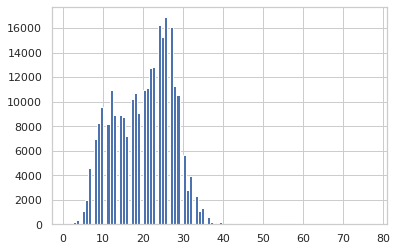

In [ ]:

plt.hist([len(a) for a in x],bins=100)
plt.show()

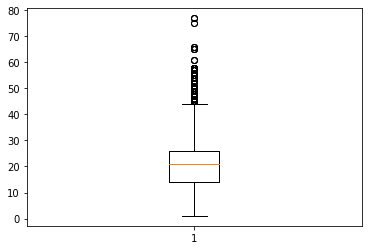

In [ ]:
plt.boxplot([len(a) for a in x])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


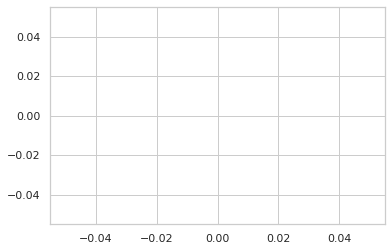

In [ ]:
import seaborn
 
seaborn.set(style='whitegrid')
 
seaborn.scatterplot([len(a) for a in x])


In [ ]:
tokenizer.word_index

In [ ]:
nos= np.array( [len (a) for a in x])
len (nos [ nos >76] )

3

In [ ]:
maxlen = 77
x= pad_sequences (x, maxlen=maxlen)

In [ ]:

vocab_size = len(tokenizer.word_index) + 1
vocab=tokenizer.word_index

In [ ]:
def get_weight_matrix(model) :

  weight_matrix = np. zeros( (vocab_size, DIM))
  
  for word, i in vocab.items () :
  
   weight_matrix[i] = model.wv[word]
  
  return weight_matrix

In [ ]:
embadding_vectors = get_weight_matrix(w2v_model)
embadding_vectors.shape

(29382, 100)

In [ ]:
model = Sequential()
model.add (Embedding (vocab_size, output_dim= DIM , weights = [embadding_vectors], input_length=maxlen, trainable=False) )
model.add (LSTM(units=128) )
model.add (Dense(1, activation= 'sigmoid' ))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model.summary()
x_train, x_test ,y_train,y_test = train_test_split(x,y)


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 77, 100)           2938200   
                                                                 
 lstm_11 (LSTM)              (None, 128)               117248    
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 3,055,577
Trainable params: 117,377
Non-trainable params: 2,938,200
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, validation_split=0.3, epochs=4)

Epoch 1/4
4406/4406 [==============================] - 47s 10ms/step - loss: 0.0824 - acc: 0.9718 - val_loss: 0.0274 - val_acc: 0.9915
Epoch 2/4
4406/4406 [==============================] - 39s 9ms/step - loss: 0.0149 - acc: 0.9957 - val_loss: 0.0217 - val_acc: 0.9942
Epoch 3/4
4406/4406 [==============================] - 39s 9ms/step - loss: 0.0078 - acc: 0.9977 - val_loss: 0.0096 - val_acc: 0.9981
Epoch 4/4
4406/4406 [==============================] - 39s 9ms/step - loss: 0.0065 - acc: 0.9980 - val_loss: 0.0117 - val_acc: 0.9975


In [ ]:
y_pred=(model.predict(x_test) >=0.5).astype(int)

NameError: ignored

In [ ]:
accuracy_score(y_test, y_pred)

0.9972591312637789

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     12772
           1       1.00      1.00      1.00     54360

    accuracy                           1.00     67132
   macro avg       1.00      0.99      1.00     67132
weighted avg       1.00      1.00      1.00     67132



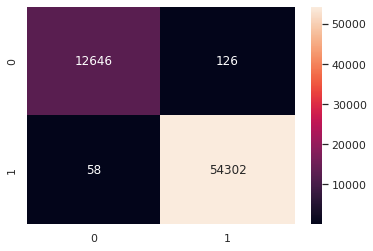

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')


In [ ]:
x = ['i feel dizzy just after i got  vaccinated']
#WHY?!? More „Americans“ have died of Covid-19 than on battlefields in all of the country’s wars combined‼️ #news #breaking #corona
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)

NameError: ignored

In [ ]:
(model.predict(x) >=0.5).astype(int)

array([[1]])